In [ ]:
import numpy as np
from tqdm.notebook import tqdm
import copy

np.set_printoptions(precision=4)

In [ ]:
grid_rows, grid_cols = 5, 5
gamma = 0.9

rwd = np.array([[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, -10, 0, 10]])

policy = [['R', 'R', 'R', 'D', 'D'],
          ['R', 'R', 'R', 'D', 'D'],
          ['U', 'U', 'NA', 'D', 'D'],
          ['U', 'U', 'NA', 'D', 'D'],
          ['U', 'U', 'R', 'R', 'G']]

water_state = (4, 2)
goal_states = [(4, 4)]
obstacle_states = [(2, 2), (3, 2)] #states 12 and 17
actions = ['U', 'D', 'L', 'R']
print_actions = [u"\u2191", u"\u2193", u"\u2190", u"\u2192"]

In [ ]:
def p(state, action):

  next_states = [] #possible next states
  next_state_prob = [] #probabilities corresponding to the posible next states
  rewards = [] #rewards corresponding to the posible next states

  state_row, state_col = state[0], state[1]

  if action == 'U':
    if state_row == 0:
      next_state = state
    else:
      next_state = (state_row - 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.8)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers right
    if state_col == grid_cols - 1:
      next_state = state
    else:
      next_state = (state_row, state_col + 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers left
    if state_col == 0:
      next_state = state
    else:
      next_state = (state_row, state_col - 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append([next_state[0], next_state[1]])

    #10% probability: breaks down
    next_state = state
    next_states.append(next_state)
    next_state_prob.append(0.1)
    rewards.append(rwd[next_state[0], next_state[1]])

  if action == 'D':


    #80% probability: move in specified direction
    if state_row == grid_rows - 1:
      next_state = state
    else:
      next_state = (state_row + 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.8)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers right
    if state_col == 0:
      next_state = state
    else:
      next_state = (state_row, state_col - 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers left
    if state_col == grid_cols - 1:
      next_state = state
    else:
      next_state = (state_row, state_col + 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #10% probability: breaks down
    next_state = state
    next_states.append(next_state)
    next_state_prob.append(0.1)
    rewards.append(rwd[next_state[0], next_state[1]])


  if action == 'R':

    #80% probability: move in specified direction
    if state_col == grid_cols - 1:
      next_state = state
    else:
      next_state = (state_row , state_col + 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.8)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers right
    if state_row == grid_rows - 1:
      next_state = state
    else:
      next_state = (state_row + 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers left
    if state_row == 0:
      next_state = state
    else:
      next_state = (state_row - 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #10% probability: breaks down
    next_state = state
    next_states.append(next_state)
    next_state_prob.append(0.1)
    rewards.append(rwd[next_state[0], next_state[1]])

  if action == 'L':

    #80% probability: move in specified direction
    if state_col == 0:
      next_state = state
    else:
      next_state = (state_row , state_col - 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.8)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers right
    if state_row == 0:
      next_state = state
    else:
      next_state = (state_row - 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers left
    if state_row == grid_rows - 1:
      next_state = state
    else:
      next_state = (state_row + 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #10% probability: breaks down
    next_state = state
    next_states.append(next_state)
    next_state_prob.append(0.1)
    rewards.append(rwd[next_state[0], next_state[1]])

  idx = np.random.choice( np.arange(len(next_states)), p=next_state_prob)
  next_state_final, reward_final = next_states[idx], rewards[idx]

  #return next_states, next_state_prob, rewards
  return next_state_final, reward_final

In [ ]:
def td_policy_evaluation(policy, alpha = 0.1, delta_convergence = 0.001):


  #values_est = np.zeros((5, 5))
  values_est = np.random.rand(5,5)
  values_est[4][4] = 0
  values_est[2][2] = 0
  values_est[3][2] = 0
  iteration_counter = 0 #episode counter

  #loop for episodes
  while True:

    #print("iteration: {}", iteration_counter)
    #assigning random initial state
    possible_states = np.delete(np.arange(25), [12, 17, 24]) #removing obstacle states
    state_initial = np.random.choice(possible_states)
    s_0 = (state_initial // 5, state_initial % 5) #getting row and col from state number

    t = 0
    s_t = s_0
    #print(s_t)

    values_est_new = copy.deepcopy(values_est)
    #Loop for each step of the episode
    while True:

      if s_t in goal_states:
        break

      a_t = policy[s_t[0]][s_t[1]]

      s_tplus1, r_t = p(s_t, a_t)

      # print(s_t, s_tplus1, r_t)
      # print(r_t + (gamma * values_est_new[s_tplus1[0]][s_tplus1[1]]) - values_est_new[s_t[0]][s_t[1]])
      values_est_new[s_t[0]][s_t[1]] = values_est_new[s_t[0]][s_t[1]] + alpha * (r_t + (gamma * values_est_new[s_tplus1[0]][s_tplus1[1]]) - values_est_new[s_t[0]][s_t[1]])


      t += 1
      s_t = s_tplus1


    #print(values_est_new)

    iteration_counter += 1

    max_norm = np.max(np.abs(values_est_new - values_est))
    values_est = copy.deepcopy(values_est_new)
    # if iteration_counter > 10000:
    #   break
    if max_norm < delta_convergence:
        break

  return values_est, iteration_counter

In [ ]:
runs = 50

values_true = np.array([[4.0187, 4.5548, 5.1575, 5.8336, 6.4553 ],
                      [4.3716, 5.0324, 5.8013, 6.6473, 7.3907 ],
                      [3.8672, 4.39, 0, 7.5769, 8.4637 ],
                      [3.4182, 3.8319, 0, 8.5738, 9.6946 ],
                      [2.9977, 2.9309, 6.0733, 9.6946, 0]])

In [ ]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.6]
deltas = [0.1, 0.01, 0.001]



for alpha in alphas:
    for delta in deltas:

        print("alpha = {} and delta = {}".format(alpha, delta))
        values_avg = np.zeros((5, 5))
        iters_avg = 0
        for i in tqdm(range(runs)):
            v, it = td_policy_evaluation(policy, alpha = alpha, delta_convergence = delta)
            values_avg = values_avg + v
            iters_avg = iters_avg + it

        values_avg = values_avg / runs
        iters_avg = iters_avg / runs
        max_norm = np.max(np.abs(values_avg - values_true))
        print("max norm from true values = {}".format(max_norm))
        print("no of episodes = {}".format(iters_avg))

alpha = 0.1 and delta = 0.1


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 6.3290701660468045
no of episodes = 48.86
alpha = 0.1 and delta = 0.01


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 3.0157966824796874
no of episodes = 353.1
alpha = 0.1 and delta = 0.001


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 0.23904438525237914
no of episodes = 22991.94
alpha = 0.2 and delta = 0.1


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 5.751492241500703
no of episodes = 36.1
alpha = 0.2 and delta = 0.01


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 2.7457878661092137
no of episodes = 194.26
alpha = 0.2 and delta = 0.001


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 0.698722158504574
no of episodes = 1405.76
alpha = 0.3 and delta = 0.1


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 5.635131813348088
no of episodes = 33.82
alpha = 0.3 and delta = 0.01


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 2.168686246882573
no of episodes = 142.44
alpha = 0.3 and delta = 0.001


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 0.6174960322176575
no of episodes = 461.08
alpha = 0.4 and delta = 0.1


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 5.168572217723298
no of episodes = 30.06
alpha = 0.4 and delta = 0.01


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 3.005255052459893
no of episodes = 92.0
alpha = 0.4 and delta = 0.001


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 0.9648112711900776
no of episodes = 210.6
alpha = 0.6 and delta = 0.1


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 4.804809822001057
no of episodes = 24.46
alpha = 0.6 and delta = 0.01


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 3.370649990371626
no of episodes = 45.78
alpha = 0.6 and delta = 0.001


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 2.175466376518041
no of episodes = 81.56


In [ ]:
best_alpha, best_delta = 0.1, 0.001

values_avg = np.zeros((5, 5))
iters_avg = 0

iters_list = np.zeros(runs)

for i in tqdm(range(runs)):
    v, it = td_policy_evaluation(policy, alpha = best_alpha, delta_convergence = best_delta)
    values_avg = values_avg + v
    iters_avg = iters_avg + it
    iters_list[i] = it

values_avg = values_avg / runs
iters_avg = iters_avg / runs
max_norm = np.max(np.abs(values_avg - values_true))
print("max norm from true values = {}".format(max_norm))
print("avg no of episodes = {}".format(iters_avg))
print("std for no of episodes = {}".format(np.std(iters_list)))


def print_values(v):

  for i in range(grid_rows):
    for j in range(grid_cols):
      print("%.4f" %v[i][j], "  ", end='')
    print("\n")

print("avg value function: ")
print_values(values_avg)


  0%|          | 0/50 [00:00<?, ?it/s]

max norm from true values = 0.16446348051164517
avg no of episodes = 26087.62
std for no of episodes = 24455.886625424155
avg value function: 
3.9105   4.4655   5.0778   5.7845   6.2908   

4.2642   4.9682   5.7608   6.6529   7.2470   

3.7807   4.2792   0.0000   7.6173   8.4182   

3.3364   3.7375   0.0000   8.6694   9.6889   

2.9199   2.9188   6.0440   9.7616   0.0000   



In [1]:
import numpy as np
from tqdm.notebook import tqdm
import copy
import matplotlib.pyplot as plt

%matplotlib inline

np.set_printoptions(precision=4)

In [14]:
grid_rows, grid_cols = 5, 5
gamma = 0.9

rwd = np.array([[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, -10, 0, 10]])

water_state = (4, 2)
goal_states = [(4, 4)]
obstacle_states = [(2, 2), (3, 2)] #states 12 and 17
possible_actions = ['U', 'D', 'L', 'R']
possible_states = np.arange(grid_rows * grid_cols)
print_actions = [u"\u2191", u"\u2193", u"\u2190", u"\u2192"]

In [3]:
def p(state, action):

  next_states = [] #possible next states
  next_state_prob = [] #probabilities corresponding to the posible next states
  rewards = [] #rewards corresponding to the posible next states

  state_row, state_col = state[0], state[1]

  if action == 'U':

    #80% probability: move in specified direction
    if state_row == 0:
      next_state = state
    else:
      next_state = (state_row - 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.8)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers right
    if state_col == grid_cols - 1:
      next_state = state
    else:
      next_state = (state_row, state_col + 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers left
    if state_col == 0:
      next_state = state
    else:
      next_state = (state_row, state_col - 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #10% probability: breaks down
    next_state = state
    next_states.append(next_state)
    next_state_prob.append(0.1)
    rewards.append(rwd[next_state[0], next_state[1]])

  if action == 'D':


    #80% probability: move in specified direction
    if state_row == grid_rows - 1:
      next_state = state
    else:
      next_state = (state_row + 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.8)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers right
    if state_col == 0:
      next_state = state
    else:
      next_state = (state_row, state_col - 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers left
    if state_col == grid_cols - 1:
      next_state = state
    else:
      next_state = (state_row, state_col + 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #10% probability: breaks down
    next_state = state
    next_states.append(next_state)
    next_state_prob.append(0.1)
    rewards.append(rwd[next_state[0], next_state[1]])


  if action == 'R':

    #80% probability: move in specified direction
    if state_col == grid_cols - 1:
      next_state = state
    else:
      next_state = (state_row , state_col + 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.8)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers right
    if state_row == grid_rows - 1:
      next_state = state
    else:
      next_state = (state_row + 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers left
    if state_row == 0:
      next_state = state
    else:
      next_state = (state_row - 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #10% probability: breaks down
    next_state = state
    next_states.append(next_state)
    next_state_prob.append(0.1)
    rewards.append(rwd[next_state[0], next_state[1]])

  if action == 'L':

    #80% probability: move in specified direction
    if state_col == 0:
      next_state = state
    else:
      next_state = (state_row , state_col - 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.8)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers right
    if state_row == 0:
      next_state = state
    else:
      next_state = (state_row - 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers left
    if state_row == grid_rows - 1:
      next_state = state
    else:
      next_state = (state_row + 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #10% probability: breaks down
    next_state = state
    next_states.append(next_state)
    next_state_prob.append(0.1)
    rewards.append(rwd[next_state[0], next_state[1]])

  idx = np.random.choice( np.arange(len(next_states)), p=next_state_prob)
  next_state_final, reward_final = next_states[idx], rewards[idx]

  #return next_states, next_state_prob, rewards
  return next_state_final, reward_final


In [4]:
def greedy_action(s_t, q_est, mode, epsilon, sigma = None):

  '''
  mode -> 'e_greedy' / 'softmax'

  '''
  if mode == 'e_greedy':

    policy_s = np.zeros(len(possible_actions))

    max_actions = np.where(q_est[s_t] == max(q_est[s_t]))[0]

    for j in range(len(possible_actions)):

      if j in max_actions:
        policy_s[j] = (epsilon / 4) + ((1 - epsilon) / len(max_actions))
      else:
        policy_s[j] = epsilon / 4

    a_idx = np.random.choice( np.arange(len(possible_actions)), p=policy_s)

  elif mode == 'softmax':

    softmax_probs = np.exp(q_est[s_t] * sigma) / np.sum(np.exp(q_est[s_t] * sigma))
    a_idx = np.random.choice( np.arange(len(possible_actions)), p=softmax_probs)


  #mode = softmax policy

  a_t = possible_actions[a_idx]
  return a_t

def calculate_values(q_est, epsilon):

  #only implemented for e_greedy policy for now

  values_est = np.zeros((grid_rows, grid_cols))

  for s in possible_states:
    s_rc = (s // 5, s % 5)
    policy_s = np.zeros(len(possible_actions))

    max_actions = np.where(q_est[s_rc] == max(q_est[s_rc]))[0]

    for j in range(len(possible_actions)):

      if j in max_actions:
        policy_s[j] = (epsilon / 4) + ((1 - epsilon) / len(max_actions))
      else:
        policy_s[j] = epsilon / 4

    if s_rc not in goal_states and s_rc not in obstacle_states:

      values_est[s_rc[0]][s_rc[1]] = np.sum(policy_s * q_est[s_rc])

  return values_est

def print_values(v):

  for i in range(grid_rows):
    for j in range(grid_cols):
      print("%.4f" %v[i][j], "  ", end='')
    print("\n")

def sarsa(max_episodes, alpha, epsilon = 0.9, initialization = 'zero', exploration = 'e_greedy'):

  '''
  initilization -> 'zero' / 'random' / 'optimistic'
  exploration -> 'e_greedy' / 'softmax'

  '''

  values = np.array([[4.0187, 4.5548, 5.1575, 5.8336, 6.4553 ],
                      [4.3716, 5.0324, 5.8013, 6.6473, 7.3907 ],
                      [3.8672, 4.39, 0, 7.5769, 8.4637 ],
                      [3.4182, 3.8319, 0, 8.5738, 9.6946 ],
                      [2.9977, 2.9309, 6.0733, 9.6946, 0]]) #true values

  q_est = {}
  no_steps_list = []
  no_episodes_list = []
  mse_list = []
  epsilon_original = epsilon

  for s in possible_states:

    s_rc = (s // 5, s % 5)
    if s_rc not in obstacle_states and s_rc not in goal_states:

      if initialization == 'zero':
        q_est[s_rc] = np.zeros(len(possible_actions))
      elif initialization == 'random':
        q_est[s_rc] = np.randn(len(possible_actions))
      elif initialization == 'optimistic':
        q_est[s_rc] = np.ones(len(possible_actions)) * 1000

    else:
      q_est[s_rc] = np.zeros(len(possible_actions))


  episode_counter = 0
  step_counter = 0

  #loop for each episode
  while True:

    possible_states_initial = np.delete(np.arange(25), [12, 17, 24]) #initialize random state
    state_initial = np.random.choice(possible_states_initial)
    s_0 = (state_initial // 5, state_initial % 5) #getting row and col from state number

    s_t = s_0
    a_t = greedy_action(s_t, q_est, mode = 'e_greedy', epsilon = epsilon)

    #step_counter = 0
    #loop for each step of the episode
    while True:

      if s_t in goal_states:
        break

      s_tplus1, r_t = p(s_t, a_t)
      a_tplus1 = greedy_action(s_tplus1, q_est, mode = 'e_greedy', epsilon = epsilon)

      q_est[s_t][possible_actions.index(a_t)] = q_est[s_t][possible_actions.index(a_t)] + alpha * \
            ( r_t + (gamma * q_est[s_tplus1][possible_actions.index(a_tplus1)]) - q_est[s_t][possible_actions.index(a_t)])

      s_t = s_tplus1
      a_t = a_tplus1

      step_counter += 1

    episode_counter += 1


    no_steps_list.append(step_counter)
    no_episodes_list.append(episode_counter)

    values_est = calculate_values(q_est, epsilon)
    mse_temp = np.sum((values_est - values)**2)/25
    mse_list.append(mse_temp)


    #exploration_decay
    if exploration == 'e_greedy':
      epsilon = max(epsilon - 0.05, 0.01)
    # #if episode_counter % 50 == 0:
    # print("episode_counter", episode_counter)
    if (episode_counter >= max_episodes):
      #print("done")
      break


  return q_est, no_steps_list, no_episodes_list, mse_list





  0%|          | 0/20 [00:00<?, ?it/s]

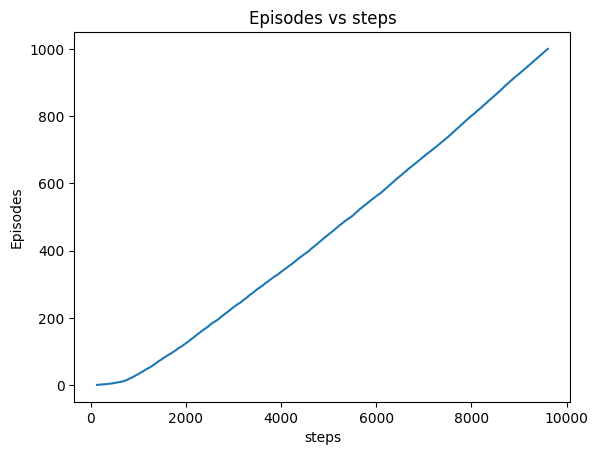

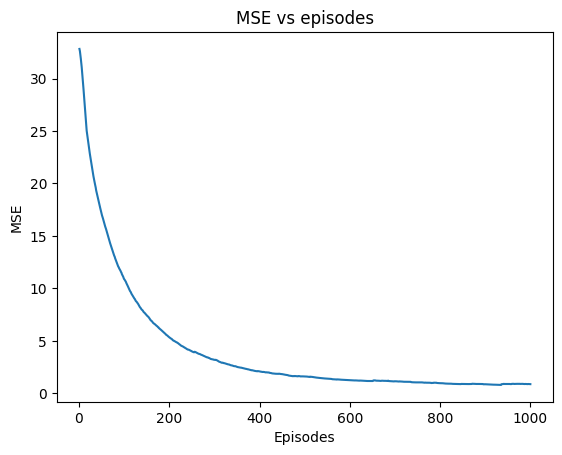

In [5]:
# 2b and 2c
max_episodes = 1000
runs = 20

plot_episodes = np.zeros(max_episodes)
plot_steps = np.zeros(max_episodes)
plot_mse = np.zeros(max_episodes)

for i in tqdm(range(runs)):

  #print(i)
  q_est, no_steps_list, no_episodes_list, mse_list = sarsa(max_episodes = max_episodes, alpha = 0.1, epsilon = 0.8, initialization = 'zero', exploration = 'e_greedy')
  plot_episodes += np.array(no_episodes_list)
  plot_steps += np.array(no_steps_list)
  plot_mse += np.array(mse_list)

plot_steps /= runs
plot_episodes /= runs
plot_mse /= runs

#print(plot_mse)

plt.plot(plot_steps, plot_episodes)
plt.title("Episodes vs steps")
plt.ylabel("Episodes")
plt.xlabel("steps")
plt.show()

plt.plot(plot_episodes, plot_mse)
plt.title("MSE vs episodes")
plt.xlabel("Episodes")
plt.ylabel("MSE")
plt.show()

In [7]:
#2d greedy policy

greedy_policy = np.zeros((grid_rows, grid_cols))

for s in possible_states:
    s_rc = (s // 5, s % 5)
    policy_s = np.zeros(len(possible_actions))

    max_actions = np.where(q_est[s_rc] == max(q_est[s_rc]))[0]
    max_action = np.random.choice(max_actions)
    #max_action = np.argmax(q_est[s_rc])
    greedy_policy[s_rc[0]][s_rc[1]] = max_action


for i in range(grid_rows):
  for j in range(grid_cols):

    if (i, j) in goal_states:
      optimal_action = 'G'
    elif (i, j) in obstacle_states:
      optimal_action = ' '
    else:
      optimal_action = print_actions[int(greedy_policy[i][j])]

    print(optimal_action, "  ", end='')
  print("\n")

→   →   ↓   ←   ↓   

→   →   →   ↓   ↓   

←   ↑       ↓   ↓   

→   ↑       ↓   ↓   

↑   ←   →   →   G   



In [8]:
import numpy as np
from tqdm.notebook import tqdm
import copy
import matplotlib.pyplot as plt

%matplotlib inline

np.set_printoptions(precision=4)

In [9]:
grid_rows, grid_cols = 5, 5
gamma = 0.9

rwd = np.array([[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, -10, 0, 10]])

water_state = (4, 2)
goal_states = [(4, 4)]
obstacle_states = [(2, 2), (3, 2)] #states 12 and 17
possible_actions = ['U', 'D', 'L', 'R']
possible_states = np.arange(grid_rows * grid_cols)
print_actions = [u"\u2191", u"\u2193", u"\u2190", u"\u2192"]

In [10]:
def p(state, action):


  next_states = [] #possible next states
  next_state_prob = [] #probabilities corresponding to the posible next states
  rewards = [] #rewards corresponding to the posible next states

  state_row, state_col = state[0], state[1]

  if action == 'U':

    #80% probability: move in specified direction
    if state_row == 0:
      next_state = state
    else:
      next_state = (state_row - 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.8)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers right
    if state_col == grid_cols - 1:
      next_state = state
    else:
      next_state = (state_row, state_col + 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers left
    if state_col == 0:
      next_state = state
    else:
      next_state = (state_row, state_col - 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #10% probability: breaks down
    next_state = state
    next_states.append(next_state)
    next_state_prob.append(0.1)
    rewards.append(rwd[next_state[0], next_state[1]])

  if action == 'D':


    #80% probability: move in specified direction
    if state_row == grid_rows - 1:
      next_state = state
    else:
      next_state = (state_row + 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.8)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers right
    if state_col == 0:
      next_state = state
    else:
      next_state = (state_row, state_col - 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers left
    if state_col == grid_cols - 1:
      next_state = state
    else:
      next_state = (state_row, state_col + 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #10% probability: breaks down
    next_state = state
    next_states.append(next_state)
    next_state_prob.append(0.1)
    rewards.append(rwd[next_state[0], next_state[1]])


  if action == 'R':

    #80% probability: move in specified direction
    if state_col == grid_cols - 1:
      next_state = state
    else:
      next_state = (state_row , state_col + 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.8)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers right
    if state_row == grid_rows - 1:
      next_state = state
    else:
      next_state = (state_row + 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers left
    if state_row == 0:
      next_state = state
    else:
      next_state = (state_row - 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #10% probability: breaks down
    next_state = state
    next_states.append(next_state)
    next_state_prob.append(0.1)
    rewards.append(rwd[next_state[0], next_state[1]])

  if action == 'L':

    #80% probability: move in specified direction
    if state_col == 0:
      next_state = state
    else:
      next_state = (state_row , state_col - 1)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.8)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers right
    if state_row == 0:
      next_state = state
    else:
      next_state = (state_row - 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #5% probability: veers left
    if state_row == grid_rows - 1:
      next_state = state
    else:
      next_state = (state_row + 1, state_col)

    if next_state in obstacle_states: #obstacle
      next_state = state

    next_states.append(next_state)
    next_state_prob.append(0.05)
    rewards.append(rwd[next_state[0], next_state[1]])

    #10% probability: breaks down
    next_state = state
    next_states.append(next_state)
    next_state_prob.append(0.1)
    rewards.append(rwd[next_state[0], next_state[1]])

  idx = np.random.choice( np.arange(len(next_states)), p=next_state_prob)
  next_state_final, reward_final = next_states[idx], rewards[idx]

  #return next_states, next_state_prob, rewards
  return next_state_final, reward_final


In [11]:
def greedy_action(s_t, q_est, mode, epsilon, sigma = None):

  '''
  mode -> 'e_greedy' / 'softmax'

  '''
  if mode == 'e_greedy':

    policy_s = np.zeros(len(possible_actions))

    max_actions = np.where(q_est[s_t] == max(q_est[s_t]))[0]

    for j in range(len(possible_actions)):

      if j in max_actions:
        policy_s[j] = (epsilon / 4) + ((1 - epsilon) / len(max_actions))
      else:
        policy_s[j] = epsilon / 4

    a_idx = np.random.choice( np.arange(len(possible_actions)), p=policy_s)

  elif mode == 'softmax':

    softmax_probs = np.exp(q_est[s_t] * sigma) / np.sum(np.exp(q_est[s_t] * sigma))
    a_idx = np.random.choice( np.arange(len(possible_actions)), p=softmax_probs)


  #mode = softmax policy

  a_t = possible_actions[a_idx]
  return a_t

def calculate_values(q_est, epsilon):

  #only implemented for e_greedy policy for now

  values_est = np.zeros((grid_rows, grid_cols))

  for s in possible_states:
    s_rc = (s // 5, s % 5)

    if s_rc not in goal_states and s_rc not in obstacle_states:

      values_est[s_rc[0]][s_rc[1]] =  np.max(q_est[s_rc])

  return values_est

def print_values(v):

  for i in range(grid_rows):
    for j in range(grid_cols):
      print("%.4f" %v[i][j], "  ", end='')
    print("\n")


def q_learning(max_episodes, alpha, epsilon = 0.9, initialization = 'zero', exploration = 'e_greedy'):

  '''
  initilization -> 'zero' / 'random' / 'optimistic'
  exploration -> 'e_greedy' / 'softmax'

  '''

  q_est = {}
  values = np.array([[4.0187, 4.5548, 5.1575, 5.8336, 6.4553 ],
                      [4.3716, 5.0324, 5.8013, 6.6473, 7.3907 ],
                      [3.8672, 4.39, 0, 7.5769, 8.4637 ],
                      [3.4182, 3.8319, 0, 8.5738, 9.6946 ],
                      [2.9977, 2.9309, 6.0733, 9.6946, 0]]) #true values

  no_steps_list = []
  no_episodes_list = []
  mse_list = []
  epsilon_original = epsilon

  for s in possible_states:

    s_rc = (s // 5, s % 5)
    if s_rc not in obstacle_states and s_rc not in goal_states:

      if initialization == 'zero':
        q_est[s_rc] = np.zeros(len(possible_actions))
      elif initialization == 'random':
        q_est[s_rc] = np.randn(len(possible_actions))
      elif initialization == 'optimistic':
        q_est[s_rc] = np.ones(len(possible_actions)) * 1000

    else:
      q_est[s_rc] = np.zeros(len(possible_actions))


  episode_counter = 0
  step_counter = 0

  while True:

    possible_states_initial = np.delete(np.arange(25), [12, 17, 24]) #removing obstacle states
    state_initial = np.random.choice(possible_states_initial)
    s_0 = (state_initial // 5, state_initial % 5) #getting row and col from state number

    t = 0
    s_t = s_0

    #a_t = greedy_action(s_t, q_est, epsilon)

    #loop for each step of the episode
    while True:

      if s_t in goal_states:
        break
      a_t = greedy_action(s_t, q_est, mode = 'e_greedy', epsilon = epsilon)

      s_tplus1, r_t = p(s_t, a_t)


      q_est[s_t][possible_actions.index(a_t)] = q_est[s_t][possible_actions.index(a_t)] + alpha * \
            ( r_t + (gamma * q_est[s_tplus1][np.argmax(q_est[s_tplus1])]) - q_est[s_t][possible_actions.index(a_t)])

      s_t = s_tplus1
      step_counter += 1

    episode_counter += 1

    no_steps_list.append(step_counter)
    no_episodes_list.append(episode_counter)

    values_est = calculate_values(q_est, epsilon)
    mse_temp = np.sum((values_est - values)**2)/25
    mse_list.append(mse_temp)


    #exploration_decay
    if exploration == 'e_greedy':
      epsilon = max(epsilon - 0.05, 0.01)

    if (episode_counter >= max_episodes):
      break


  return q_est, no_steps_list, no_episodes_list, mse_list


  0%|          | 0/20 [00:00<?, ?it/s]

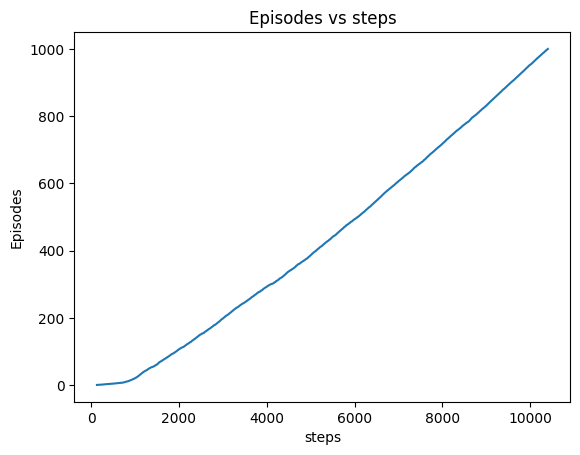

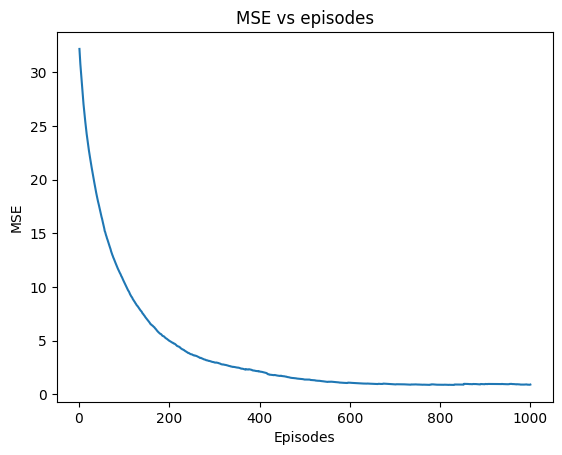

In [12]:
# 3b and 3c
max_episodes = 1000
runs = 20

plot_episodes = np.zeros(max_episodes)
plot_steps = np.zeros(max_episodes)
plot_mse = np.zeros(max_episodes)

for i in tqdm(range(runs)):

  #print(i)
  q_est, no_steps_list, no_episodes_list, mse_list = q_learning(max_episodes = max_episodes, alpha = 0.1, epsilon = 0.8, initialization = 'zero', exploration = 'e_greedy')

  # print(len(no_steps_list), len(no_episodes_list), len(mse_list))
  # print(no_steps_list)
  plot_episodes += np.array(no_episodes_list)
  plot_steps += np.array(no_steps_list)
  plot_mse += np.array(mse_list)

plot_steps /= runs
plot_episodes /= runs
plot_mse /= runs

#print(plot_mse)

plt.plot(plot_steps, plot_episodes)
plt.title("Episodes vs steps")
plt.ylabel("Episodes")
plt.xlabel("steps")
plt.show()

plt.plot(plot_episodes, plot_mse)
plt.title("MSE vs episodes")
plt.xlabel("Episodes")
plt.ylabel("MSE")
plt.show()

In [13]:
#3d greedy policy

greedy_policy = np.zeros((grid_rows, grid_cols))

for s in possible_states:
    s_rc = (s // 5, s % 5)
    policy_s = np.zeros(len(possible_actions))

    max_actions = np.where(q_est[s_rc] == max(q_est[s_rc]))[0]
    max_action = np.random.choice(max_actions)
    #max_action = np.argmax(q_est[s_rc])
    greedy_policy[s_rc[0]][s_rc[1]] = max_action


for i in range(grid_rows):
  for j in range(grid_cols):

    if (i, j) in goal_states:
      optimal_action = 'G'
    elif (i, j) in obstacle_states:
      optimal_action = ' '
    else:
      optimal_action = print_actions[int(greedy_policy[i][j])]

    print(optimal_action, "  ", end='')
  print("\n")

↓   ↓   ↓   ↓   ←   

↓   →   →   ↓   ↓   

→   ↑       →   ↓   

→   ↑       →   ↓   

↑   ←   →   ↑   G   

